In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train,x_test = x_train /255.0, x_test /255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ",x_train.shape)
print("y_train,shape: ",y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train,shape:  (50000,)


In [ ]:
# number of classes
K = len(list(set(y_train)))
print("number of classes: ", K)

number of classes:  10


In [ ]:
from os import access
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(32, (3,3), strides=2, activation='relu')(x)
x = Conv2D(32, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


model = Model(i, x)

In [ ]:
# Compile and Fit
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3114 - loss: 1.8595 - val_accuracy: 0.4882 - val_loss: 1.4010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4599 - loss: 1.4812 - val_accuracy: 0.5179 - val_loss: 1.3367
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5015 - loss: 1.3783 - val_accuracy: 0.5532 - val_loss: 1.2474
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5234 - loss: 1.3089 - val_accuracy: 0.5850 - val_loss: 1.1601
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5469 - loss: 1.2528 - val_accuracy: 0.6014 - val_loss: 1.1242
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5701 - loss: 1.2041 - val_accuracy: 0.6056 - val_loss: 1.1186
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5735 - loss: 1.1842 - val_accuracy: 0.5985 - val_loss: 1.1239
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5883 - loss: 1.1434 

In [ ]:
r.history

{'accuracy': [0.3721199929714203,
  0.46691998839378357,
  0.5056800246238708,
  0.5300400257110596,
  0.5473600029945374,
  0.5680199861526489,
  0.5756999850273132,
  0.5867800116539001,
  0.5976799726486206,
  0.6067399978637695,
  0.6114599704742432,
  0.6169000267982483,
  0.6223999857902527,
  0.6317399740219116,
  0.6312800049781799,
  0.6348999738693237,
  0.6389200091362,
  0.6415600180625916,
  0.6492000222206116,
  0.6515399813652039],
 'loss': [1.7008140087127686,
  1.458650827407837,
  1.365144968032837,
  1.298235297203064,
  1.2540980577468872,
  1.2129231691360474,
  1.177455186843872,
  1.149161696434021,
  1.1260172128677368,
  1.1022088527679443,
  1.0879766941070557,
  1.0728895664215088,
  1.0556995868682861,
  1.0352351665496826,
  1.035719394683838,
  1.0214097499847412,
  1.0053611993789673,
  1.001108169555664,
  0.9861446619033813,
  0.9803256988525391],
 'val_accuracy': [0.48820000886917114,
  0.5178999900817871,
  0.5532000064849854,
  0.5849999785423279,
  

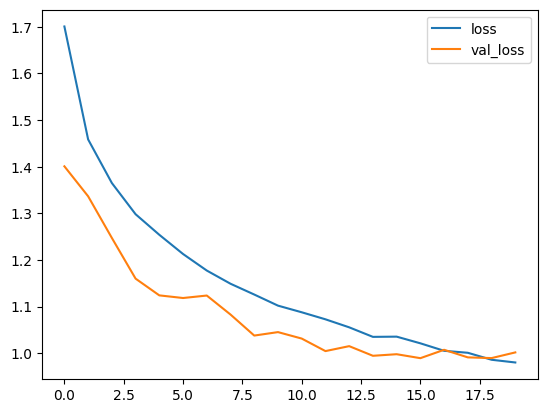

In [ ]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

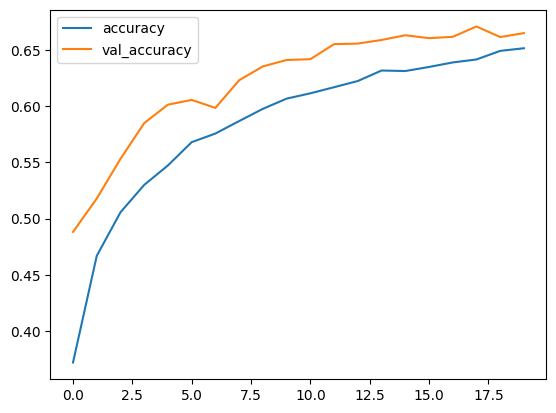

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[756  17  25  13   6   9  10   8 125  31]
 [ 33 819   1  12   1   3   8   2  56  65]
 [ 95   7 527  78  67 100  58  22  35  11]
 [ 43   9  57 479  38 230  59  34  33  18]
 [ 46   3  99  92 519  60  72  82  22   5]
 [ 31   4  47 203  23 609  26  30  18   9]
 [ 13  11  44  77  28  59 740   2  20   6]
 [ 35   0  24  59  53  97  14 687   5  26]
 [ 96  30   8  12   4   7   5   2 827   9]
 [ 54 140   3  15   5  13   9  11  63 687]]


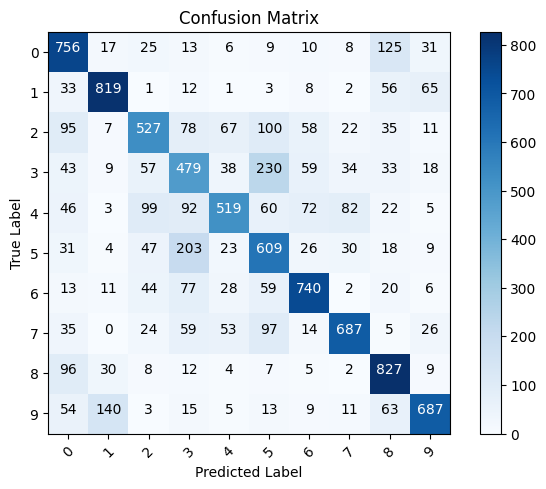

In [ ]:
# Plot the confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matric(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matric(cm,list(range(10)))

In [ ]:
# Label mapping
labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: truck Predicted: automobile')

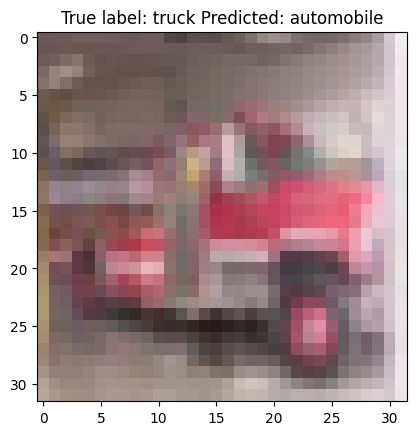

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))